# MULTIPLE LINEAR REGRESSION

## INTRODUCTION

    First of all, i have to write my process.
    I follow five instruction for solving any data science problem:

    - Define the problem

    - Prepare Data / Data Preprocessing
        Get Data
        Data Cleaning/Wrangling
        Statistical Analysis
        Data Visualization
        Feature Selection/Scaling
        Data Transformation

    - Check Algorithms
        Train & Test Data
        Apply ML Algorithm
        Test
        Perform Measure
        Evaulate accuarcy of different algorithm

    - Improve Results
        Algorithm Tuning

    - Present Results
        Conclusion
        Presentation

## LOG

In [1]:
# Log
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='mltp_reg.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

## IMPORT LIBRARY

In [2]:
#import the libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set()

## IMPORT DATA

In [3]:
#import the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head(10)
dataset.shape

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


(50, 5)

In [4]:
# information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [5]:
#show independent variable
X = dataset.iloc[:,:-1].values
#X

In [6]:
#show dependent variable
y = dataset.iloc[:, 4]
#y

## MISSING DATA

In [7]:
#missing the data
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
# taking care of missing data

# first option is removed this line
# second option is replace mean, strategy=mean
# third option is replace median, strategy=median
# fourth option is replace most frequent (like single mode), strategy=most_frequent
# axis=0 for the column based, axis=1 for the row based

#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='mean', axis=0) #help(Imputer)
#imputer = imputer.fit(X[:, 1:3])
#X[:,1:3] = imputer.transform(X[:, 1:3])
#X

In [9]:
#help(imputer)

## CATEGORICAL DATA

In [10]:
#handle the categorical data with LabelEncoder abd OneHotEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = LabelEncoder()
X[:,3] = labelEncoder.fit_transform(X[:, 3])
oneHotEncoder = OneHotEncoder(categorical_features = [3])
X = oneHotEncoder.fit_transform(X).toarray()
#X

C:\Users\mmahm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\mmahm\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [11]:
#avoid dummy variables trap, so eliminate one columns that it is into the dummy variables
X = X[:, 1:]
#X

## STATISTIC

In [12]:
# some statistic information
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## VISUALIZATION

In [13]:
# time series analysis
# histogram
# density
# pdf
# cdf
# heatmap or corr matrix

## CORRELATION

In [14]:
# correlation
corr_all = dataset.corr()
corr_all

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## SPLIT DATA

In [15]:
#splitting dataset as test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train
#X_test
#y_train
#y_test

## FEATURES SCALE

In [16]:
#features scale
pass #because it is unnecessary
#if you want to do scaling, coefficient is changed by the model.

"""
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
"""

'\nfrom sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\n'

## FIT THE MODEL

In [17]:
#fitting the model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
#estimating
y_hat = regressor.predict(X_test)
#y_hat

## VISUALIZATION

Text(0.5, 1.0, 'Real Test Values & Machine Estimate')

Text(0.5, 0, 'axis')

Text(0, 0.5, 'Target Values')

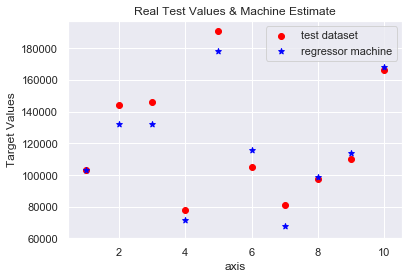

In [19]:
#visualization for deep understand
axis_test = list(range(1,len(X_test)+1,1))
real = plt.scatter(axis_test, y_test, color='red', marker='o', label='test dataset')
estimate = plt.scatter(axis_test, y_hat, color='blue', marker='*', label='regressor machine')
plt.title('Real Test Values & Machine Estimate')
plt.xlabel('axis')
plt.ylabel('Target Values')
plt.legend(handles=[real, estimate])
plt.show()

Text(0.5, 1.0, 'Real Train Values & Machine Estimate')

Text(0.5, 0, 'axis')

Text(0, 0.5, 'Target Values')

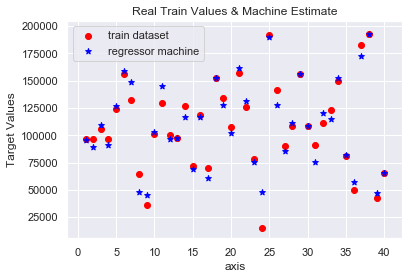

In [20]:

#visualization for deep understand-2
axis_train = list(range(1,len(X_train)+1,1))
real_train = plt.scatter(axis_train, y_train, color='red', marker='o', label='train dataset')
estimate_train = plt.scatter(axis_train, regressor.predict(X_train), color='blue', marker='*', label='regressor machine')
plt.title('Real Train Values & Machine Estimate')
plt.xlabel('axis')
plt.ylabel('Target Values')
plt.legend(handles=[real_train, estimate_train])
plt.show()

Text(0.5, 1.0, 'Real All Values & Machine Estimate')

Text(0.5, 0, 'axis')

Text(0, 0.5, 'Target Values')

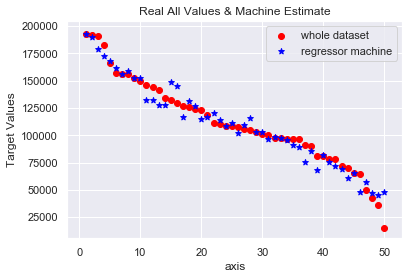

In [21]:
#visualization for deep understand-3
axis_all = list(range(1,len(X)+1,1))
real_all = plt.scatter(axis_all, y, color='red', marker='o', label='whole dataset')
estimate_all = plt.scatter(axis_all, regressor.predict(X), color='blue', marker='*', label='regressor machine')
plt.title('Real All Values & Machine Estimate')
plt.xlabel('axis')
plt.ylabel('Target Values')
plt.legend(handles=[real_all, estimate_all])
plt.show()

## BACKWARD ELIMINATION

In [22]:
#prepare backward elimination
import statsmodels.formula.api as sm
X = np.append(arr=np.ones((50,1),dtype=int),values=X,axis=1) #bo*x0=b0 ==> x0=1, please add x0 or 1
#X

In [23]:
#apply backward elimination
X_opt = X[:, [0, 1, 2, 3, 4, 5]] #look at p-value
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           1.34e-27
Time:                        22:18:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
#apply backward elimination-1
X_opt = X[:, [0, 2, 3, 4, 5]] #look at p-value
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           8.50e-29
Time:                        22:18:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
x1          -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
x2             0.8059      0.046     17.571      0.000       0.714       0.898
x3            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x4             0.0271      0.017      1.625      0.111      -0.007       0.061
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#apply backward elimination-2
X_opt = X[:, [0, 3, 4, 5]] #look at p-value
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           4.53e-30
Time:                        22:18:09   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#apply backward elimination-3
X_opt = X[:, [0, 3, 5]] #look at p-value
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           2.16e-31
Time:                        22:18:09   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
#apply backward elimination-3
X_opt = X[:, [0, 3]] #look at p-value
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           3.50e-32
Time:                        22:18:09   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VISUALIZATION

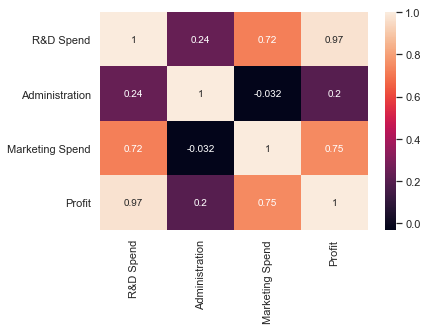

In [28]:
#some visualization for the elimination
import seaborn as sns
correlations = dataset.corr(method='pearson')
sns.heatmap(correlations, annot=True)

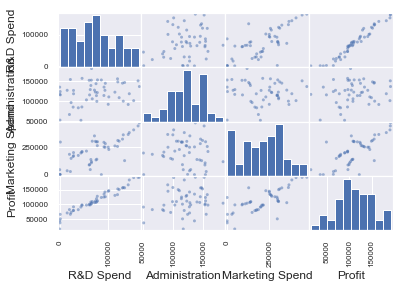

In [29]:
#some visualization for the elimination
from   pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(dataset)
plt.show()

In [30]:

# =============================================================================
# Backward Elimination with p-values only:
# 
# import statsmodels.formula.api as sm
# def backwardElimination(x, sl):
#     numVars = len(x[0])
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(y, x).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         if maxVar > sl:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     x = np.delete(x, j, 1)
#     regressor_OLS.summary()
#     return x
#  
# SL = 0.05
# X_opt = X[:, [0, 1, 2, 3, 4, 5]]
# X_Modeled = backwardElimination(X_opt, SL)
# Backward Elimination with p-values and Adjusted R Squared:
# 
# import statsmodels.formula.api as sm
# def backwardElimination(x, SL):
#     numVars = len(x[0])
#     temp = np.zeros((50,6)).astype(int)
#     for i in range(0, numVars):
#         regressor_OLS = sm.OLS(y, x).fit()
#         maxVar = max(regressor_OLS.pvalues).astype(float)
#         adjR_before = regressor_OLS.rsquared_adj.astype(float)
#         if maxVar > SL:
#             for j in range(0, numVars - i):
#                 if (regressor_OLS.pvalues[j].astype(float) == maxVar):
#                     temp[:,j] = x[:, j]
#                     x = np.delete(x, j, 1)
#                     tmp_regressor = sm.OLS(y, x).fit()
#                     adjR_after = tmp_regressor.rsquared_adj.astype(float)
#                     if (adjR_before >= adjR_after):
#                         x_rollback = np.hstack((x, temp[:,[0,j]]))
#                         x_rollback = np.delete(x_rollback, j, 1)
#                         print (regressor_OLS.summary())
#                         return x_rollback
#                     else:
#                         continue
#     regressor_OLS.summary()
#     return x
#  
# SL = 0.05
# X_opt = X[:, [0, 1, 2, 3, 4, 5]]
# X_Modeled = backwardElimination(X_opt, SL)
# =============================================================================
